Perform linear regression with regularization on the data

## Loading the data

### Subtask:
Load the `Car_Price_Prediction.csv` file into a pandas DataFrame.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Car_Price_Prediction.csv')
display(df.head())
display(df.info())

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


None

## Data preprocessing

### Subtask:
Handle categorical features, missing values, and scale numerical features if necessary.


**Reasoning**:
Identify categorical and numerical features, apply one-hot encoding to categorical features, apply standard scaling to numerical features, and concatenate the processed features.



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical features
categorical_features = ['Make', 'Model', 'Fuel Type', 'Transmission']
numerical_features = ['Year', 'Engine Size', 'Mileage']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformers to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessor to the DataFrame
processed_data = preprocessor.fit_transform(df.drop('Price', axis=1))

# Get the feature names after one-hot encoding
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine numerical and one-hot encoded feature names
all_feature_names = numerical_features + list(onehot_feature_names)

# Create a new DataFrame with the processed data and feature names
processed_df = pd.DataFrame(processed_data, columns=all_feature_names)

display(processed_df.head())

,Year,Engine Size,Mileage,Make_Audi,Make_BMW,Make_Ford,Make_Honda,Make_Toyota,Model_Model A,Model_Model B,Model_Model C,Model_Model D,Model_Model E,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual
0,0.686031,1.076274,-0.387368,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.526933,-1.072952,-0.040282,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.745852,1.271658,0.020070,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.686031,-0.193723,-0.139243,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.064048,0.587813,0.694904,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Spliting the data

Split the data into training and testing sets.


**Reasoning**:
Split the processed data and the target variable into training and testing sets for model training and evaluation.



In [ ]:
from sklearn.model_selection import train_test_split

X = processed_df
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 18)
Shape of X_test: (200, 18)
Shape of y_train: (800,)
Shape of y_test: (200,)


## Training the model

### Subtask:
Train a linear regression model with regularization (e.g., Lasso or Ridge) on the training data.


**Reasoning**:
Train a Lasso regression model on the training data as instructed.



In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

## Evaluating the model

Evaluate the performance of the trained model on the testing data using appropriate metrics.


**Reasoning**:
Evaluate the performance of the trained Lasso model on the test data using MSE and R-squared metrics.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 5000064.070494911
R-squared Score: 0.8172937626303158


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = lasso_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 1809.440718256762
Root Mean Squared Error: 2236.082304052092


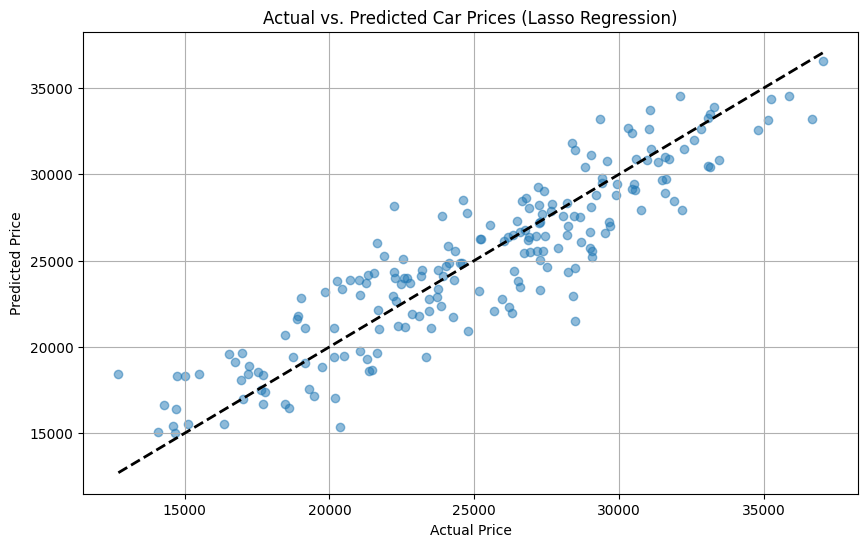

In [10]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Car Prices (Lasso Regression)")
plt.grid(True)

# Add a line representing perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd # Import pandas if not already imported

# Create input widgets for each feature
make_input = widgets.Text(description='Make:')
model_input = widgets.Text(description='Model:')
year_input = widgets.IntText(description='Year:')
engine_size_input = widgets.FloatText(description='Engine Size:')
mileage_input = widgets.IntText(description='Mileage:')
fuel_type_input = widgets.Text(description='Fuel Type:')
transmission_input = widgets.Text(description='Transmission:')

# Create a button to trigger prediction
predict_button = widgets.Button(description='Predict Price')
output_widget = widgets.Output()

# Function to handle button click
def on_predict_button_clicked(b):
    with output_widget:
        # Get input values
        car_details = {
            'Make': [make_input.value],
            'Model': [model_input.value],
            'Year': [year_input.value],
            'Engine Size': [engine_size_input.value],
            'Mileage': [mileage_input.value],
            'Fuel Type': [fuel_type_input.value],
            'Transmission': [transmission_input.value]
        }

        # Create a DataFrame from input
        car_df = pd.DataFrame(car_details)

        # Preprocess the input data
        # Ensure input columns are in the same order as training data
        # If any new categorical values are entered, OneHotEncoder will handle them based on handle_unknown='ignore'
        processed_car_data = preprocessor.transform(car_df)
        processed_car_df = pd.DataFrame(processed_car_data, columns=all_feature_names)


        # Predict the price
        predicted_price = lasso_model.predict(processed_car_df)

        print(f"Predicted Car Price: ${predicted_price[0]:,.2f}")

# Link button click to the prediction function
predict_button.on_click(on_predict_button_clicked)

# Display the widgets
display(make_input, model_input, year_input, engine_size_input, mileage_input, fuel_type_input, transmission_input, predict_button, output_widget)

# Display options for categorical features
print("Available Makes:", df['Make'].unique())
print("Available Models:", df['Model'].unique())
print("Available Fuel Types:", df['Fuel Type'].unique())
print("Available Transmission types:", df['Transmission'].unique())

Text(value='', description='Make:')

Text(value='', description='Model:')

IntText(value=0, description='Year:')

FloatText(value=0.0, description='Engine Size:')

IntText(value=0, description='Mileage:')

Text(value='', description='Fuel Type:')

Text(value='', description='Transmission:')

Button(description='Predict Price', style=ButtonStyle())

Output()

Available Makes: ['Honda' 'Ford' 'BMW' 'Audi' 'Toyota']
Available Models: ['Model B' 'Model C' 'Model A' 'Model D' 'Model E']
Available Fuel Types: ['Petrol' 'Electric' 'Diesel']
Available Transmission types: ['Manual' 'Automatic']
